In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

In [2]:
df = pd.read_csv('C19 Data.csv', 
                 parse_dates = ["date"]) #change date to datetimens64

In [ ]:
#convert str to datetime64 format
#df['date'] = pd.to_datetime(df['date'],  format='%Y-%m-%d')

#change date display format from YMD to DMY
#df['date'] = df['date'].dt.strftime('%d-%m-%Y')

#df['date'] = df['date'].dt.strftime('%Y-%m-%d')

#df['date'] = pd.to_datetime(df['date'],  format='%d-%m-%Y')

In [22]:
#df.head(10)
df.info()
#df.isnull().sum() 
#df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94158 entries, 0 to 94157
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   iso_code                               94158 non-null  object        
 1   continent                              89705 non-null  object        
 2   location                               94158 non-null  object        
 3   date                                   94158 non-null  datetime64[ns]
 4   total_cases                            91157 non-null  float64       
 5   new_cases                              91154 non-null  float64       
 6   new_cases_smoothed                     90144 non-null  float64       
 7   total_deaths                           81202 non-null  float64       
 8   new_deaths                             81357 non-null  float64       
 9   new_deaths_smoothed                    90144 non-null  float6

In [ ]:
sml_df = df.drop(columns = ['new_cases_smoothed', 'new_cases_per_million',
                     'new_cases_smoothed_per_million', 'new_deaths_smoothed',
                     'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 
                     'reproduction_rate', 'icu_patients',
                     'icu_patients_per_million', 'hosp_patients',
                     'hosp_patients_per_million', 'weekly_icu_admissions',
                     'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
                     'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
                     'total_tests_per_thousand', 'new_tests_per_thousand',
                     'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
                     'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
                     'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
                     'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
                     'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
                     'new_vaccinations_smoothed_per_million', 'stringency_index',
                     'population', 'population_density', 'median_age', 'aged_65_older',
                     'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
                     'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
                     'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
                     'life_expectancy', 'human_development_index'])

sml_df

In [21]:
new_df = df.groupby("date").dt.month_name().rename("month").groupby(["location", "iso_code", ])["total_cases"].max().reset_index()

new_df

AttributeError: 'DataFrameGroupBy' object has no attribute 'dt'

In [4]:
#new_data = data.groupby(data["date"].dt.month_name().rename("month"))
USA = new_df[new_df["location"] == "United States"].groupby(['date']).sum()
India = new_df[new_df["location"] == "India"].groupby(['date']).sum()
MY = new_df[new_df["location"] == "Malaysia"].groupby(["date"]).sum()
NZ = new_df[new_df['location'] == 'New Zealand'].groupby(['date']).sum()

In [5]:
USA.tail()

,total_cases
date,
2021-06-03,33326437.0
2021-06-04,33343297.0
2021-06-05,33357205.0
2021-06-06,33362600.0
2021-06-07,33378096.0


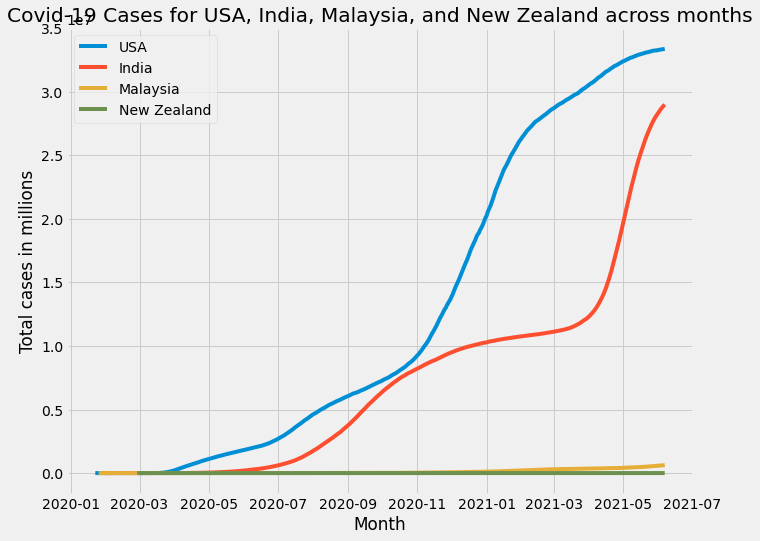

In [25]:
fig = figure(figsize = (10,8))
ax = fig.add_subplot(111) 
#plt.style.use('fivethirtyeight')

ax.plot(USA[['total_cases']], label = "USA")
ax.plot(India[['total_cases']], label = 'India')
ax.plot(MY[["total_cases"]], label = "Malaysia")
ax.plot(NZ[["total_cases"]], label = "New Zealand")
ax.set_xlabel("Month")
ax.set_ylabel('Total cases in millions')
ax.title.set_text('Covid-19 Cases for USA, India, Malaysia, and New Zealand across months')

plt.legend()

plt.show()